# Example Usage of plotDist

This notebook presents the usage of the `plotDist` and `utilities` module.

The general starting point is a 3-dimensional array `samples` of size `samples.shape = (nObservables, nXrange, nSamples)`, where
* `nObservables` is the number of observables
* `nXrange` the independent variable of the observables
* `nSamples` the number of statistical data for each observable at each `xRange` point

## Init

### Import modules

In [1]:
# Numeric and aata handling modules
import numpy as np
import pandas as pd

# Plotting modules
import matplotlib.pylab as plt

# Local modules
import plotDist as pD # Plotting
import utilities as ut # Data manipulation

### Define statistic sample array

Compute random array for later use. This array follows exponenital shape which is 'smeared' by gaussian noise.

In [2]:
help(ut.generatePseudoSamples)

Help on function generatePseudoSamples in module utilities:

generatePseudoSamples(xRange, nSamples, expPars, mean=0.0, sDev=0.1)
    Generates 3-dimensional pseudo statistical correlator data.
    
    The first dimension being different observables, the second the x-data
    of the correlator and the last the number of statistical samples.
    The correlator follow an exponential shape
    $$
      C_i(x) = \sum_{ a_{ij}, b_{ij} in expPars } \exp( - a_{ij} x - b_{ij} )
    $$
    and Gaussian noise is added.
    
    Parameters
    ----------
      xRange : array
        The number of x range for the exponential input.
        Length of array is second dimension of output.
    
      nSamples : int
        The number of statistical repetitions. Third dimension of array.
    
      expPars : 3-dimensional np.array
        The shape is (number of observables, number of exponentials, 2)
        The exponential parameters. E.g.,
          expPars = [ [(a11, b11), (a12, b12)], [(a21, b21)

In [3]:
# Parameters
nC, nT, nSamples = 4, 32, 100

# x-range
nt  = np.arange(nT)

Define the exponenotial parameters and generate the pseudo samples.

In [4]:
aAA1 = 1./nT; aAA2 = 4./nT
bAA1 = 0.5; bAA2 = 1.0

aBB1 = -aAA1; aBB2 = -aAA2;
bBB1 = bAA1 + nT*aAA1; bBB2 = bAA2 + nT*aAA2

expPars = np.array([
    [(aAA1, bAA1), (aAA2, bAA2)], # C_{AA}
    [(0., 20.), (0., 20.)],       # C_{AB} set to zero
    [(0., 20.), (0., 20.)],       # C_{BA} set to zero
    [(aBB1, bBB1), (aBB2, bBB2)], # C_{BA}
])

samples = ut.generatePseudoSamples(nt, nSamples, expPars)

# Single sample plots

In this section you find routines for data of one `samples` array.

## Visualize sample data

In [5]:
help(pD.plotSamples)

Help on function plotSamples in module plotDist:

plotSamples(xRange, samples, ax=None, **kwargs)
    Creates errorbar plot for all the correlator components in one frame.
    
    Parameters
    ----------
      xRange : array
        The number of x-values for sample input.
        Length of array is second dimension of samples.
    
      samples : 3-dimensional array
        Dimensions are the number of observables, the number of x-values and
        the number of statistical samples.
    
      ax : 'matplotlib.axes'
        Plot samples in this figure. If 'None', create new object.
    
      **kwargs: keyword arguments
        Will be passed to 'ax.errorbar'.
    
      Returns
      -------
        ax : 'matplotlib.axes'



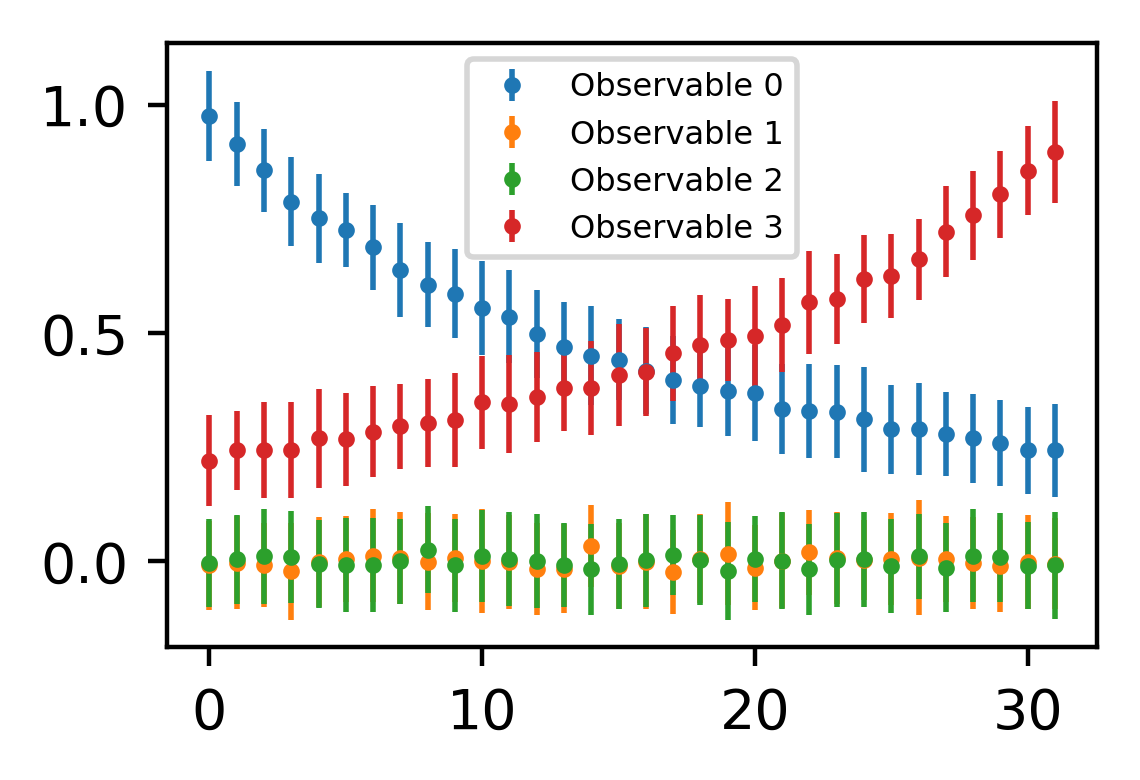

In [6]:
fig, ax = plt.subplots(dpi=400, figsize=(3, 2))

pD.plotSamples(nt, samples, ax=ax, marker=".", linestyle="None", lw=1, ms=4)
ax.legend(loc="best", fontsize="xx-small")

plt.show(fig)

## Plot distribution of individual samples

In [7]:
help(pD.plotSampleDistributions)

Help on function plotSampleDistributions in module plotDist:

plotSampleDistributions(samples, nXStart=0, nXStep=0, obsTitles=None, xRange=None)
    Creates a 'matplotlib.figure' which contains a grid of distribution plots.
    The data is plotted for all 'Observables' values on the x-axis and
    selected 'xRange' values on the y-axis.
    Each individual frame contains a distribution plot with a fitted PDF, Bins
    and KDE.
    
    Parameters
    ----------
      samples : array, shape = (nObservables, nXrange, nSamples)
        The statsitical HMC data.
    
      nXStart : int
        Index to nX dimension of samples array for plotting frames. Plots
        will start at this index.
    
      nXStep : int
        Stepindex to nX dimension of samples array for plotting frames. Only
        each 'nXStep' will be shown.
    
      obsTitles : None or list, length = nObservables
        Row titles for figure.
    
      xRange : None or iterable
        If 'None' creates a range of 

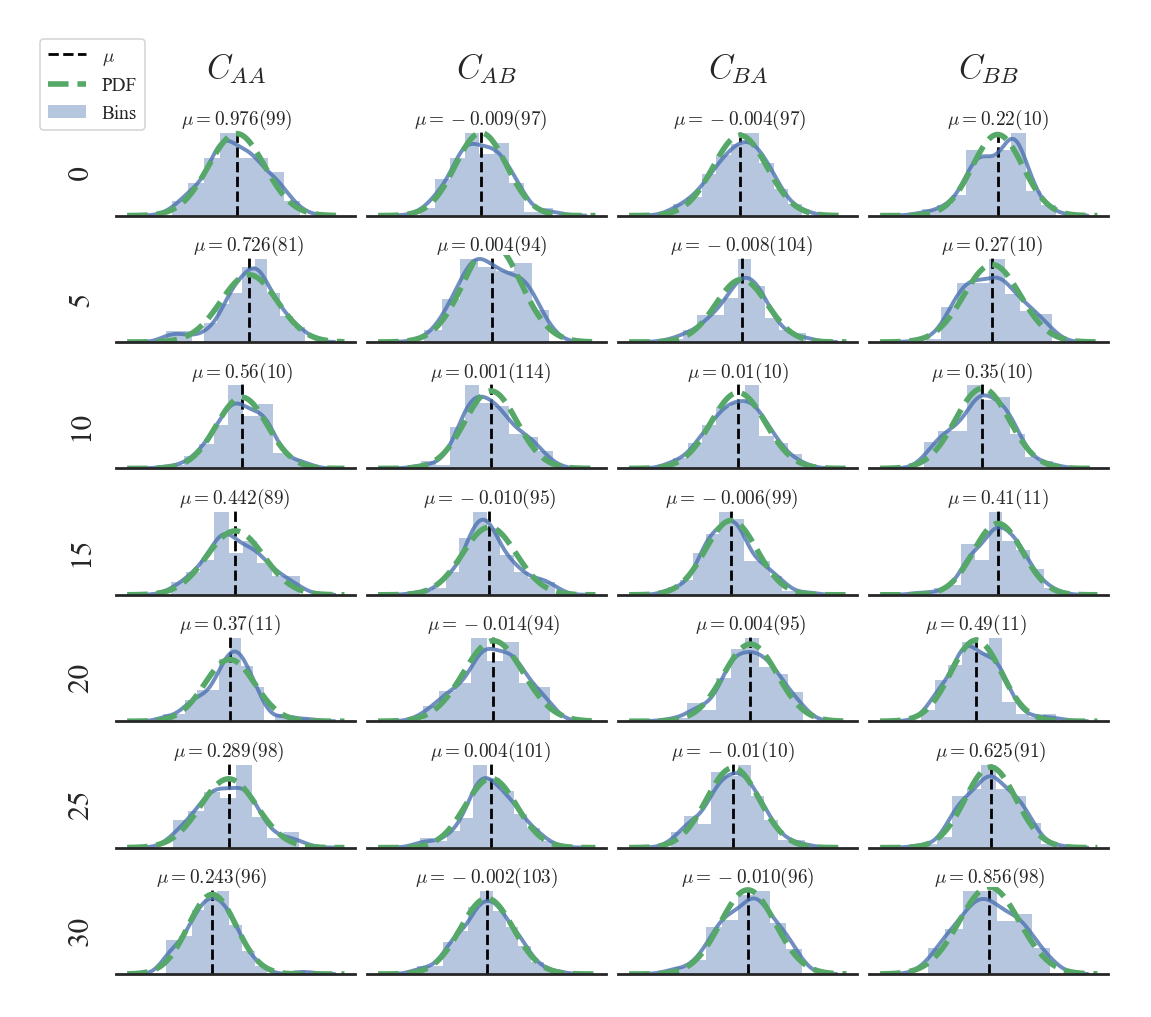

In [8]:
nTstart = 0; nTstep  = 5
obsTitles = [r"$C_{%s}$" % ij for ij in ["AA", "AB", "BA", "BB"]]
fig = pD.plotSampleDistributions(samples, nXStart=nTstart, nXStep=nTstep, obsTitles=obsTitles)
plt.show(fig)

## Plot individual Kernel Density Eesimtates (KDEs) for distributions

In [9]:
help(pD.plotDistribution)

Help on function plotDistribution in module plotDist:

plotDistribution(dist)
    Plots the fitted PDF, KDE and CDF as well as the PDF differences between
    fits, binning and KDE.
    The figure contains additional informations like:
      * Kolmogorov-Smirnov test statistics and P-values
      * The KDE difference defined by
        $$
          \Delta PDF(x)
          = 2*[PDF_{KDE}(x) - PDF_{FIT}(x)]/[PDF_{KDE}(x) + PDF_{FIT}(x)]
        $$
        and the integrated KDE difference is given by
        $$ \sqrt{ \int dx [\Delta PDF(x)]^2 } $$
    
    Parameters
    ----------
      dist : array or list, one dimensional
    
    Returns
    -------
      fig : 'matplotlib.figure'
    
    Note
    ----
      Abbreviations:
      * KDE : Kernel Density Estimate
      * PDF : Probability Density Function
      * CDF : Cumulative Density Function
    
      This routine uses seaborn to estimate the bins and KDE, scipy for the
      Kolmogorov-Smirnov test
      (https://en.wikipedia.o

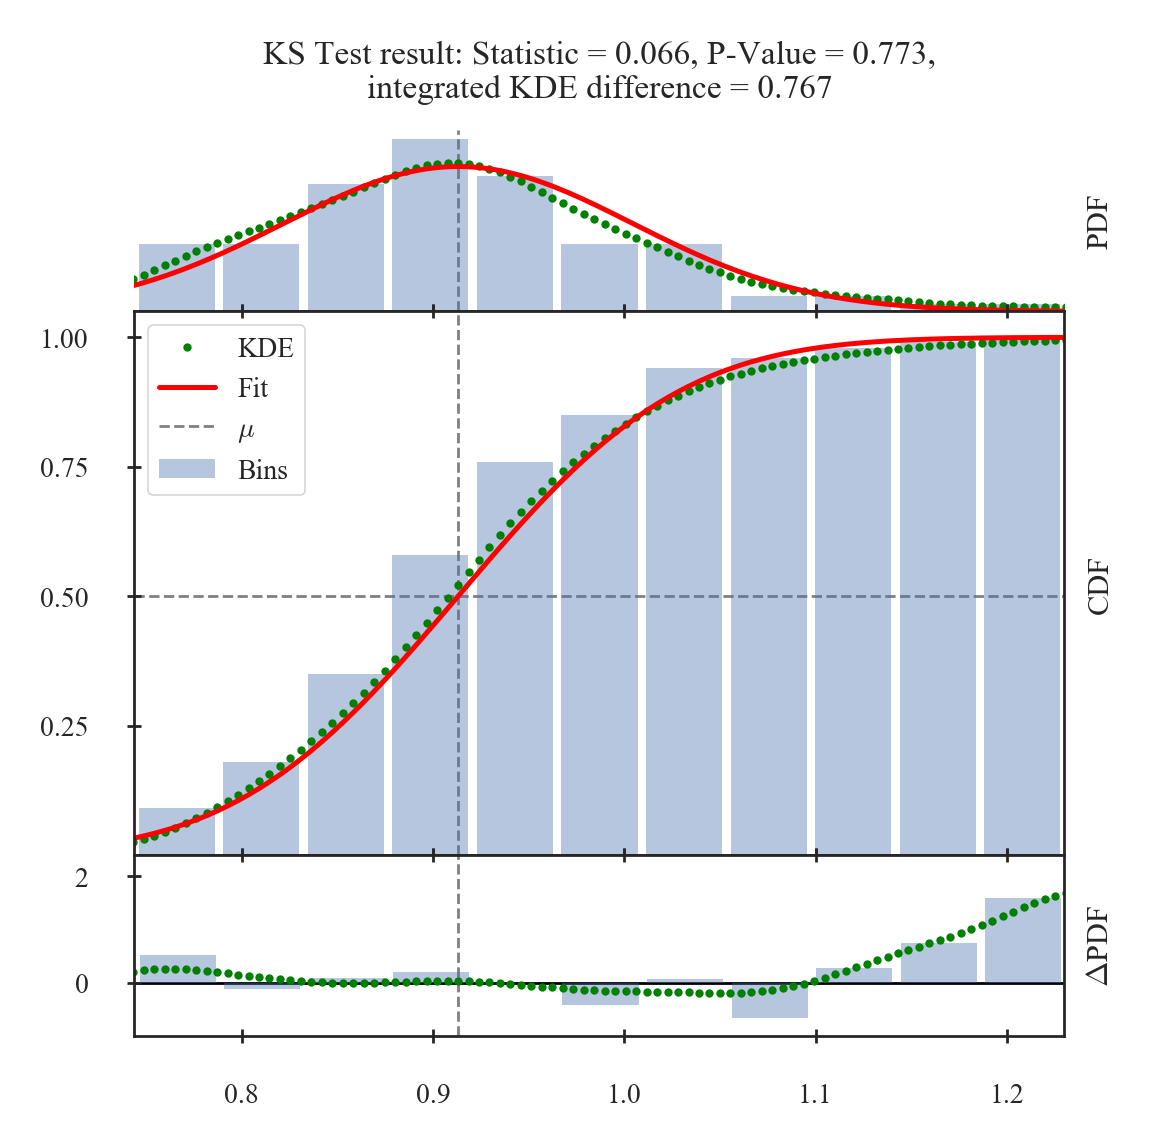

In [10]:
AA = 0; nt = 1
dist = samples[AA, nt]

fig  = pD.plotDistribution(dist)
plt.show(fig)

# Collective sample plots

In this section you find routines for visualizing more than one independent variable dependencies.

## Get sample statistics

In [11]:
help(ut.getStatisticsFrame)

Help on function getStatisticsFrame in module utilities:

getStatisticsFrame(samples, nXStart=0, nXStep=1, obsTitles=None)
    Computes a statistic frame for a given correlator bootstrap ensemble.
    
    This routine takes statistical data 'samples' (see parameters) as input.
    For each individual distribution within the sample data,
    this routine fits a Gaussian Probability Density Function (PDF) and computes
    Kernel Density Estimate (KDE).
    The output of this routine is a data frame, which contains the
    following information for each individual distribution of data within
    the samples array:
      * 'mean': the mean value of the distribution
      * 'sDev': the standard deviation of the individual distribution
      * 'kdeDiff': the relative vector norm of the KDE and the fitted PDF
          $$
            \sqrt{
              \int dx [ 2*(PDF_{KDE} - PDF_{FIT})/(PDF_{KDE} + PDF_{FIT}) ]^2
            }
          $$
      * 'Dn' and 'pValue': the statistic and the

In [12]:
nTstart = 0; nTstep  = 5
obsTitles = [r"$C_{%s}$" % ij for ij in ["AA", "AB", "BA", "BB"]]

df = ut.getStatisticsFrame(samples, nXStart=nTstart, nXStep=nTstep, obsTitles=obsTitles)

print(df.describe())
df.head()

              nX       mean       sDev         Dn     pValue    kdeDiff
count  28.000000  28.000000  28.000000  28.000000  28.000000  28.000000
mean   15.000000   0.241620   0.099083   0.062582   0.793964   0.418545
std    10.183502   0.298172   0.006754   0.015080   0.202048   0.148991
min     0.000000  -0.014377   0.081051   0.041478   0.192574   0.223898
25%     5.000000  -0.004326   0.095341   0.050589   0.708700   0.319289
50%    15.000000   0.115365   0.098593   0.061772   0.839833   0.362218
75%    25.000000   0.416176   0.102701   0.070423   0.959883   0.472779
max    30.000000   0.976246   0.113718   0.106503   0.995355   0.835679


,observable,nX,mean,sDev,Dn,pValue,kdeDiff
0,$C_{AA}$,0,0.976246,0.098542,0.069785,0.721605,0.324398
1,$C_{AA}$,5,0.725628,0.081051,0.075760,0.603978,0.542447
2,$C_{AA}$,10,0.555148,0.103505,0.044383,0.989238,0.420394
3,$C_{AA}$,15,0.441573,0.089422,0.077894,0.564821,0.313906
4,$C_{AA}$,20,0.368734,0.105381,0.066021,0.776026,0.607436


## Prepare collective pseudo sample data frame 

Assume you have more than one indpendent variable and want to anaylze the collective dependence of the dependet variable.
You can mimic this dependence by adding new columns to the statistic frames.
In this case, the columns are named `nBinSize` and `nSamples`.

In [13]:
# Define independt variable ranges
binSizeRange = [1,2,5]
sampleSizeRange = [400, 500, 700, 1000]
nt  = np.arange(nT)

# Create storage frame
df = pd.DataFrame()

# Generate pseudo samples for each parameter configuration
for nBinSize in binSizeRange:
    for nSamples in sampleSizeRange:
        ## Generate individual pseudo sample set
        samples = ut.generatePseudoSamples(nt, nSamples, expPars)
        ## Get temporary statistics data frame
        tmp = ut.getStatisticsFrame(samples, nXStart=nTstart, nXStep=nTstep, obsTitles=obsTitles)
        ## Store independent variable parameter
        tmp["nBinSize"] = nBinSize
        tmp["nSamples"] = nSamples
        ## Collect in data frame
        df = df.append(tmp)

df.head()

,observable,nX,mean,sDev,Dn,pValue,kdeDiff,nBinSize,nSamples
0,$C_{AA}$,0,0.980867,0.098036,0.028169,0.908764,0.289194,1,400
1,$C_{AA}$,5,0.707376,0.097260,0.033112,0.772807,0.518992,1,400
2,$C_{AA}$,10,0.546794,0.105400,0.044807,0.389590,0.376547,1,400
3,$C_{AA}$,15,0.438698,0.094373,0.031541,0.821025,0.475487,1,400
4,$C_{AA}$,20,0.354509,0.097923,0.025477,0.957513,0.306628,1,400


## Plot parameter dependent errorbars for mean values

In [14]:
help(pD.errBarPlot)

Help on function errBarPlot in module plotDist:

errBarPlot(dataFrame, meanKey='mean', sDevKey='sDev', xKey='nBinSize', rowKey='observable', colKey='nX', colorKey='nSamples', errBarKwargs=None, shareY=False)
    Creates a grid of errorbar plots.
    
    Each frame in the grid plot displays the 'meanKey' and its
    standard deviation 'sDevKey' over the independent variable 'xKey'.
    The columns of the grid are given by the 'colKey' entries and
    the rows are given by the 'rowKey'.
    The 'colorKey' plots decides which entries are shown in different
    colors within each frame.
    
    Parameters
    ----------
      dataFrame : 'pandas.DataFrame'
        This data frame must contain the values of the following keys.
    
      meanKey : string
        Name of the dataFrame key which will used for plotting the mean value for
        each frame of the grid.
    
      sDevKey : string
        Name of the dataFrame key which will used for plotting the standard
        deviation va

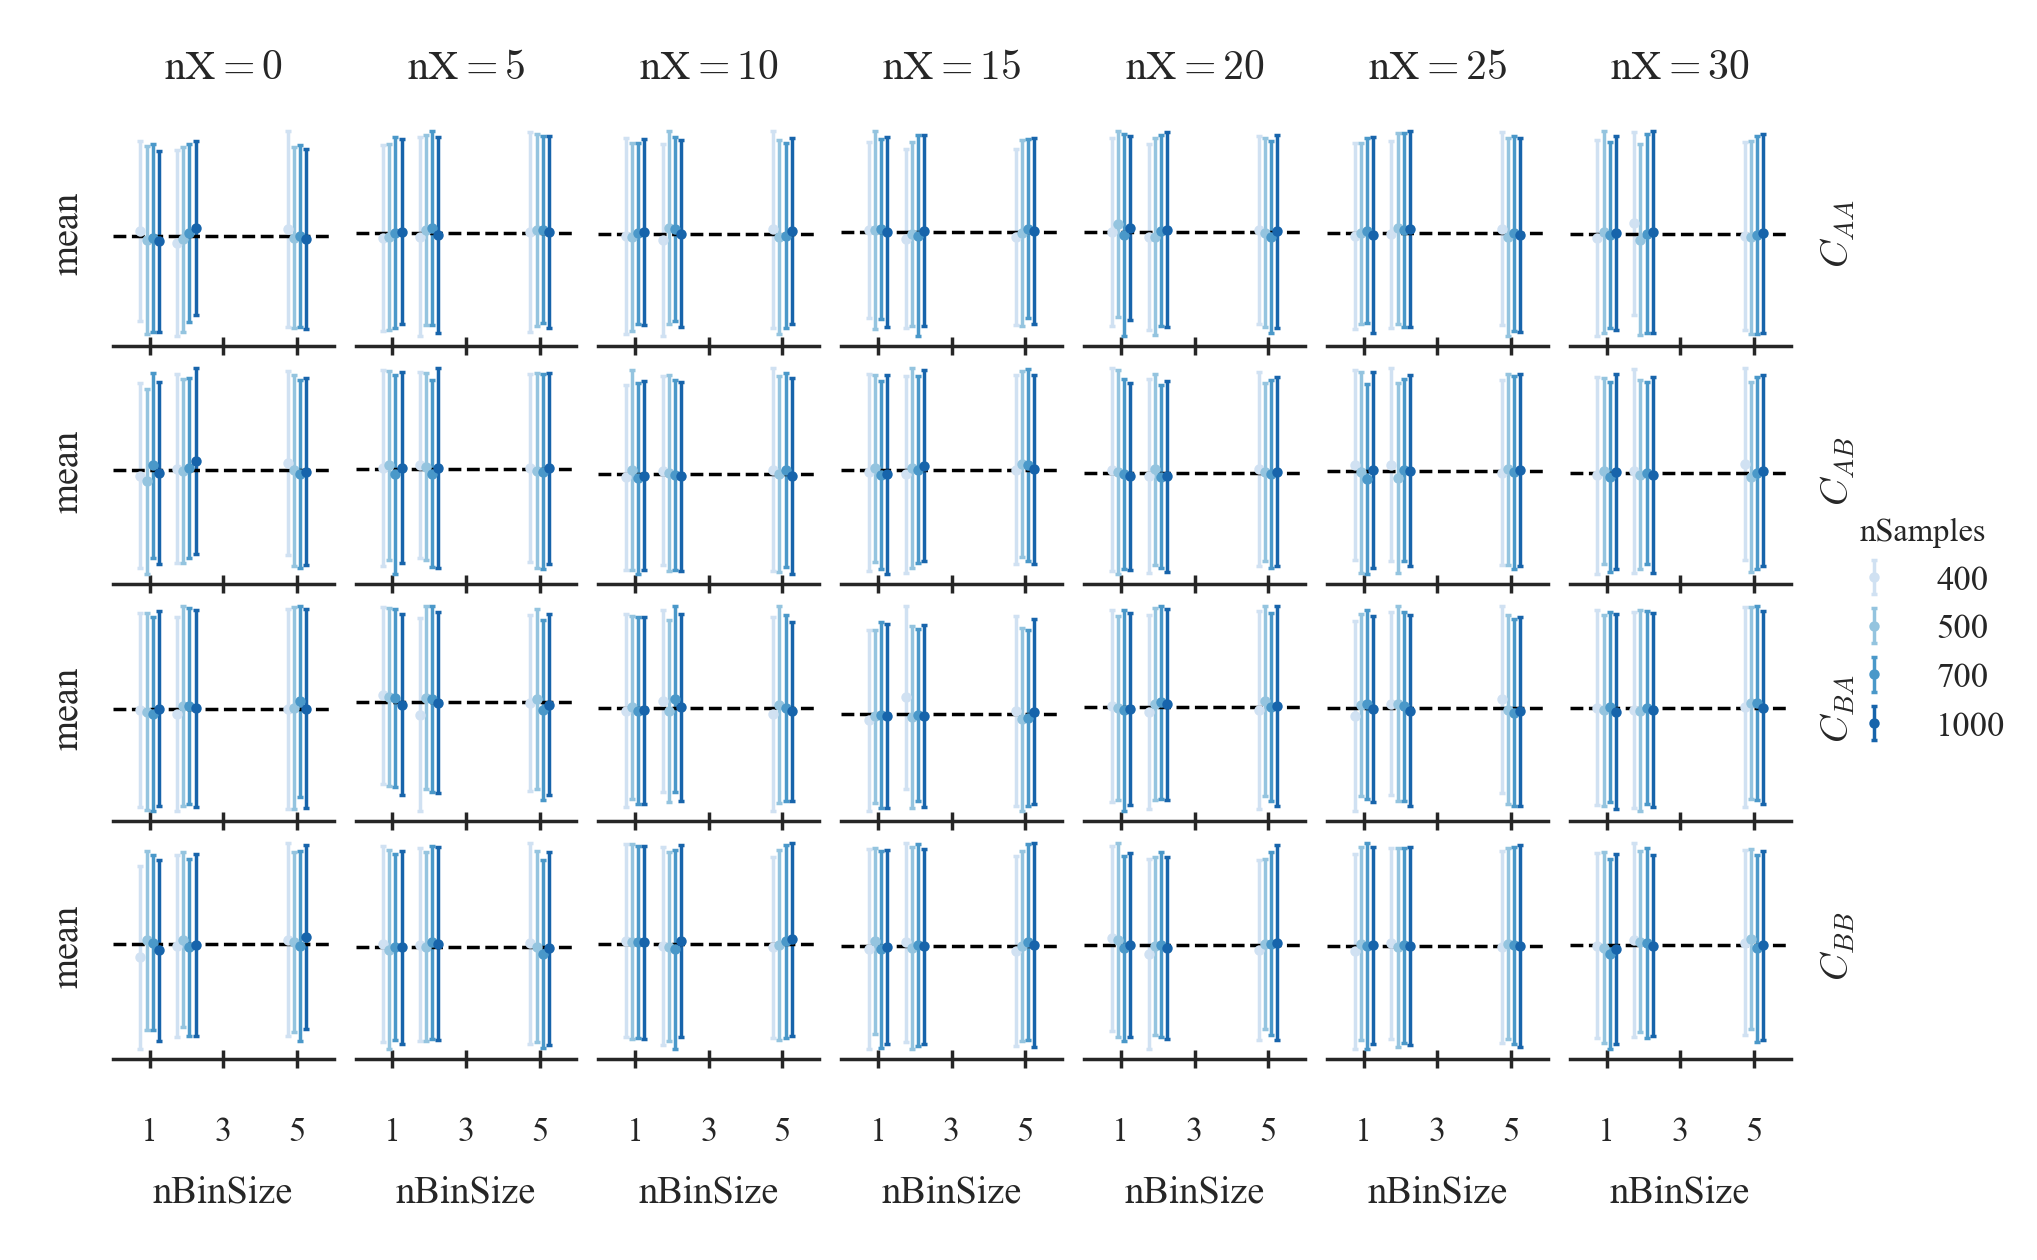

In [15]:
g = pD.errBarPlot(df)
plt.show(g)

## Summary convergence plot for distributions

Suppose you want to summarize the previous frame for several ensembles at once. 
This is done by the `plotFluctuations` method.
In this example, this method computes the average and std of `mean` and `sDev` over `nX` and `observables`.
The informations are seperatly computed for different values of `nBinSize` and `nSamples`.

In [16]:
help(ut.getFluctuationFrame)

Help on function getFluctuationFrame in module utilities:

getFluctuationFrame(dataFrame, valueKeys, collectByKeys, averageOverKeys=None)
    Routine for computing the collective average and standard deviation
    information for specified keys in a data frame.
    
    Computes the mean and standard deviations for the 'valueKeys' over all keys
    no collected in 'collectByKeys'.
    Afterwards further averages over 'averageOverKeys':
    '''pseudo_code
    >>> avg[valueKey, collectAvgKey] = average(
    >>>   average( df[collectKey, valueKey, restKeys], restKeys)[keys, valueKeys],
    >>>   keys in averageOverKeys
    >>> )
    >>> std[valueKey, collectAvgKey] = average(
    >>>   std( df[collectKey, valueKey, restKeys], restKeys)[keys, valueKeys],
    >>>   keys in averageOverKeys
    >>> )
    '''
    for all valueKeys and collectAvgKeys, where
    '''pseudo_code
    >>> collectAvgKey in collectKey and not in averageOverKeys
    '''
    
    Parameters
    ----------
      dataFram

In [17]:
fluctFrame = ut.getFluctuationFrame(
    df, 
    valueKeys=["mean", "sDev"], # present collective mean and sDev statistics
    collectByKeys=["nSamples", "nBinSize"] # group by nSamples and nBinSize 
)
fluctFrame.head()

avg_mean  avg_sDev  std_mean  std_sDev
nSamples nBinSize                                        
400      1         0.241682  0.099833  0.296055  0.002848
         2         0.242591  0.100117  0.293965  0.003168
         5         0.244174  0.100314  0.295426  0.003852
500      1         0.243398  0.099550  0.295163  0.003550
         2         0.242975  0.099760  0.295431  0.002499

In [18]:
help(pD.plotFluctuations)

Help on function plotFluctuations in module plotDist:

plotFluctuations(fluctFrame, valueKey, axisKey)
    Routine for visualizing fluctuations of statistical data.
    
    Plots the average values and standard deviations for collective datasets
    in bar plots.
    
    Parameters
    ----------
      fluctFrame : 'pandas.DataFrame'
        A data frame containing fluctuation data.
        It must have the columns '["avg_{valueKey}", "std_{valueKey}"]' and
        'axisKey' must be specified in the indices.
        The easiest way to generate such a frame is using the
        'utilities.getFluctuationFrame' method.
    
      valueKey : string
        Name of the dataFrame key which dependence is analyzed.
    
      axisKey : string
        Name of the dataFrame key which will be displayed on the y-axis.
        Must be in the indices of the 'fluctFrame'
    
    Returns
    -------
      fig : 'matplotlib.figure'



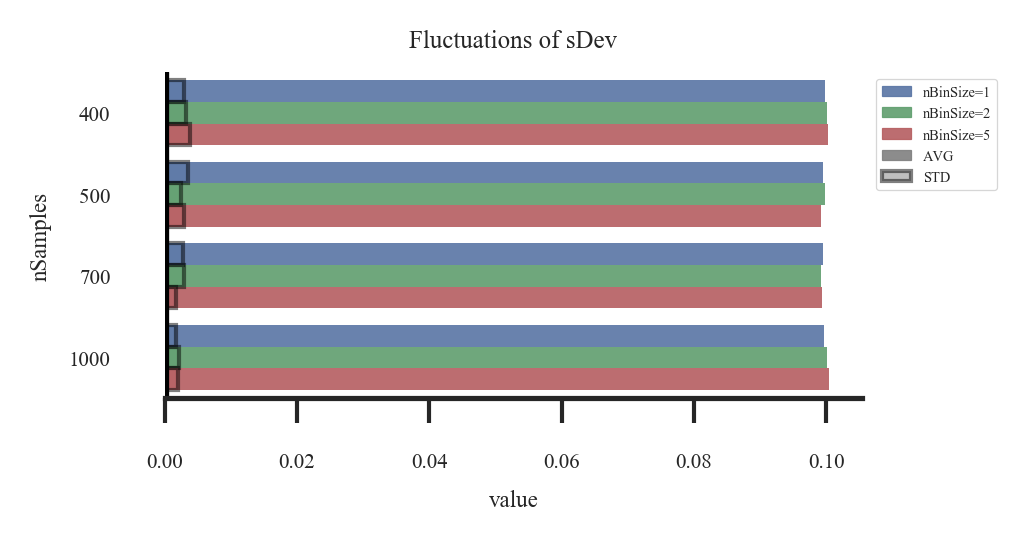

In [19]:
fig = pD.plotFluctuations(fluctFrame, valueKey="sDev", axisKey="nSamples")
plt.show(fig)